# Calcul de trajectoires de planètes

Le but de ce TP est de calculer numériquement les trajectoires de 5 planètes du système solaire : Jupiter, Saturne, Uranus, Neptune et Pluton. 
Ce sujet est inspiré du polycopié d'*Analyse Numérique* d'Ernst Hairer.

On considère un système planétaire idéalisé où les planètes ne sont soumises qu'aux forces gravitationnelles exercées par les autres planètes et par le soleil. La force gravitationnelle $\mathbf{F}_{2\to 1}$ exercée par le corps $2$, de masse $m_2$ et situé en $\mathbf{x}_2=(x_2,y_2,z_2)$ sur un corps $1$, de masse $m_1$ et situé en $\mathbf{x}_1=(x_1,y_1,z_1)$ est donnée par l'expression suivante :

$$
\mathbf{F}_{2\to 1} = - Gm_2m_1 \frac{(\mathbf{x}_1-\mathbf{x}_2)}{\|\mathbf{x}_1-\mathbf{x}_2\|_2^3}
$$
avec $G$ la constante de gravitation universelle. Le principe fondamental de la dynamique permet alors d'écrire pour le corps $i \in \{1,6\}$
$$
\sum_{j\neq i} \mathbf{F}_{j\to i} = m_i \overrightarrow{a}_i.
$$
Avec l'expression de la force gravitationnelle, nous obtenons ainsi,
$$
\frac{d^2}{dt^2}\mathbf{x}_i = - G \sum_{j=1,j\neq i}^6 m_j \frac{(\mathbf{x}_i-\mathbf{x}_j)}{\|\mathbf{x}_i-\mathbf{x}_j\|_2^3}
$$
avec la correspondance
* $i = 1$ correspond à Jupiter, de masse $m_1 = 0.000954786104043$,
* $i = 2$ à Saturne, avec $m_2 = 0.000285583733151$,
* $i = 3$ à Uranus, avec $m_3 = 0.0000437273164546$,
* $i = 4$ à Neptune, avec $m_4 = 0.0000517759138449$,
* $i = 5$ à Pluton, avec $m_5 = 1/(1.3 . 10^8)$,
* $i = 6$ au Soleil, avec $m_6 = 1.00000597682$.

Les unités de masse sont relatives au soleil, lui-même de masse différente de $1$ après correction pour tenir compte de la masse des planètes proches. 
Les unités de temps sont en jours terrestres. 
Le mouvement des planètes est étudié dans le référentiel lié au soleil, qui a donc la position initiale $\mathbf{x}_6 = 0$. On imposera que le soleil reste fixe, et donc 
$$
\frac{d^2}{dt^2}\mathbf{x}_6 = 0.
$$

####  Positions et vitesses initiales des planètes 


La constante de gravitation universelle est $G = 2.95912208286.10^{−4}$. 
Les positions initiales des 5 planètes, données en unités astronomiques ($1\ A.U.\ =\ 149597870\ km$), ainsi que leurs vitesses initiales, sont données dans le tableau ci-après.


$$
\begin{array}{|c|c|c|c|c|c|}
\hline
& \text{Jupiter} &\text{Saturne} & \text{Uranus} & \text{Neptune} & \text{Pluton} \\
\hline
x & -3.5023653 & 9.0755314 & 8.3101420 & 11.4707666 & -15.5387357 \\
\hline
y & -3.8169847 & -3.0458353 & -16.2901086 & -25.7294829 & -25.2225594 \\
\hline
z & -1.5507963 & -1.6483708 & -7.2521278 & -10.816945 & -3.1902382 \\
\hline
u & 0.00565429 & 0.00168318 & 0.00354178 & 0.00288930 & 0.00276725 \\
\hline
v & -0.00412490 & 0.00483525 & 0.00055029 & 0.00039677 & -0.00136504 \\
\hline
w & -0.00190589 & 0.00192462 & 0.00055029 & 0.00039677 & -0.00136504 \\
\hline
\end{array}
$$

La période de révolution de ces planètes (planète naine pour la dernière) autour du soleil vaut :
* Jupiter : ~ 4 332,589 jours (~ 12 années)
* Saturne : ~ 10 759,23 jours (~ 30 années)
* Uranus : ~ 30 685,4 jours (~ 84 années)
* Neptune : ~ 60 266 jours (~ 165 années)
* Pluton : ~ 90 588 jours (~ 248 années)
On choisira donc pour la suite un temps de simulation $t_{fin}=100\,000$ jours.

Le système d'équations donné par :
$$
\left \{
\begin{array}{l}
\displaystyle \frac{d^2}{dt^2}\mathbf{x}_i = - G \sum_{j=1,j\neq i}^6 m_j \frac{(\mathbf{x}_i-\mathbf{x}_j)}{\|\mathbf{x}_i-\mathbf{x}_j\|_2^3}, \ 1 \le i \le 5,\\
\frac{d^2}{dt^2}\mathbf{x}_6 = 0,
\end{array}
\right.
$$
est un système différentiel d'ordre $2$. On le met sous la forme d'un système d'équations différentielles du premier ordre en introduisant la variable intermédiaire vitesse $\mathbf{v}_i = \frac{d}{dt}\mathbf{x}_i=(u_i,v_i,w_i)$:
$$
\left \{
\begin{array}{l}
\mathbf{x}_i' = \mathbf{v}_i, \ 1 \le i \le 5,\\
\displaystyle \mathbf{v}_i' = - G \sum_{j=1,j\neq i}^6 m_j \frac{(\mathbf{x}_i-\mathbf{x}_j)}{\|\mathbf{x}_i-\mathbf{x}_j\|_2^3}, \ 1 \le i \le 5,\\
\mathbf{x}_6' = \mathbf{v}_6, \\
\mathbf{v}_6' = 0,
\end{array}
\right.
$$
En introduisant un vecteur $X(t)$ de taille $3\times6 + 3 \times 6$ collectant la position et la vitesse de chaque corps, ce problème peut se réécrire sous la forme $X(t) = f(X(t))$ avec $f$ le champs de vecteur défini ci-dessus.

### Mise en place

Vous devez commencer par importer les librairies usuelles de calcul scientifique et de dessin

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib notebook

On définit ici le vecteur $X_0 = X(t=0)$ contenant la donnée initiale à l'instant $t=0$ :

In [6]:
X0 = np.reshape(np.array([[-3.5023653],[-3.8169847],[-1.5507963],
               [9.0755314],[-3.0458353],[-1.6483708],
               [8.3101420],[-16.2901086],[-7.2521278],
               [11.4707666],[-25.7294829],[-10.816945],
               [-15.5387357],[-25.2225594],[-3.1902382],
               [0],[0],[0],
               [0.00565429],[-0.00412490],[-0.00190589],
               [0.00168318],[0.00483525],[0.00192462],
               [0.00354178],[0.00055029],[0.00055029],
               [0.00288930],[0.00039677],[0.00039677],
               [0.00276725],[-0.00136504],[-0.00136504],
               [0],[0],[0]]),36)
masse = np.array([0.000954786104043,0.000285583733151,0.0000437273164546,
                  0.0000517759138449,1/(1.3e+08),1.00000597682])

Les $18$ premières composantes correspondent aux coordonnées des $6$ planètes, et les $18$ suivantes aux vitesses.

Ecrivez une fonction $g~: \mathbb{R}^3 \times \mathbb{R}^3 \to \mathbb{R}^3$ qui à $(\mathbf{x},\mathbf{y})$ associe
$\displaystyle
g(\mathbf{x},\mathbf{y}) = -G \frac{\mathbf{x}-\mathbf{y}}{\|\mathbf{x}-\mathbf{y}\|_2^3}
$

A l'aide de la fonction $g$, écrivez une fonction $F$ qui calcule la valeur de chacune des composantes du vecteur $f(X)$ à partir du vecteur $X$. Pour s'assurer que la fonction est implémentée correctement, vérifiez que $f(X_0)\sim Y_0$ où $Y_0$ est donné ci-dessous.

In [4]:
Y0 = np.reshape(np.array([[  5.65429000e-03],
       [ -4.12490000e-03],
       [ -1.90589000e-03],
       [  1.68318000e-03],
       [  4.83525000e-03],
       [  1.92462000e-03],
       [  3.54178000e-03],
       [  5.50290000e-04],
       [  5.50290000e-04],
       [  2.88930000e-03],
       [  3.96770000e-04],
       [  3.96770000e-04],
       [  2.76725000e-03],
       [ -1.36504000e-03],
       [ -1.36504000e-03],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  6.55508471e-06],
       [  7.14330362e-06],
       [  2.90222184e-06],
       [ -2.93171861e-06],
       [  9.83126993e-07],
       [  5.32139620e-07],
       [ -3.23479515e-07],
       [  6.33972827e-07],
       [  2.82242872e-07],
       [ -1.23768779e-07],
       [  2.77595057e-07],
       [  1.16698055e-07],
       [  1.74143109e-07],
       [  2.82611068e-07],
       [  3.57133235e-08],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00]]),36)

In [8]:
## Fonction g
Gconst = 2.95912208286e-04;
def g(x,y):
    d = x[:3]-y[:3]
    r = - Gconst*d/(np.linalg.norm(d,ord = 2)**3)
    return r

In [21]:
def F(X):
    position = np.reshape(X[:18],(6,3))
    force = np.zeros((6,6,3))
    for i in range(6):
        for j in range(i):
            force[i,j] = g(position[i],position[j])
            force[j,i] = - force[i,j]
    accelerate = np.zeros((6,3))
    for i in range(6):
        for j in range(6):
            accelerate[i] = accelerate[i] + masse[j]*force[i,j]
    accelerate[5] = np.array([0,0,0])
    accelerate = np.reshape(accelerate,18)
    r = np.concatenate((X[18:36],accelerate))
    return r

Y0test = F(X0)
print(Y0test)
print(Y0)
print(Y0test - Y0)

[ 5.65429000e-03 -4.12490000e-03 -1.90589000e-03  1.68318000e-03
  4.83525000e-03  1.92462000e-03  3.54178000e-03  5.50290000e-04
  5.50290000e-04  2.88930000e-03  3.96770000e-04  3.96770000e-04
  2.76725000e-03 -1.36504000e-03 -1.36504000e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.55508471e-06  7.14330362e-06
  2.90222184e-06 -2.93171861e-06  9.83126993e-07  5.32139620e-07
 -3.23479515e-07  6.33972827e-07  2.82242872e-07 -1.23768779e-07
  2.77595057e-07  1.16698055e-07  1.74143109e-07  2.82611068e-07
  3.57133235e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00]
[ 5.65429000e-03 -4.12490000e-03 -1.90589000e-03  1.68318000e-03
  4.83525000e-03  1.92462000e-03  3.54178000e-03  5.50290000e-04
  5.50290000e-04  2.88930000e-03  3.96770000e-04  3.96770000e-04
  2.76725000e-03 -1.36504000e-03 -1.36504000e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.55508471e-06  7.14330362e-06
  2.90222184e-06 -2.93171861e-06  9.83126993e-07  5.32139620e-07
 -3.23479515e-07  6.3397

#### Méthode d'Euler Explicite

Ecrivez une fonction *Eulerexp* dépendant de $X$ et $dt$, le pas de temps, qui pour $X$ quelconque à l'instant $t$ renvoie une approximation de $X$ à l'instant $t+dt$ par la méthode d'Euler explicite.

In [23]:
## Eulerexp
def Eulerexp(X,dt):
    return X + dt*F(X)

Partant de l'instant $t=0$ jusqu'à l'instant $t_{fin}=100000$, calculer et stocker la position de Jupiter. On prendra dans un premier temps $dt=100$.

<IPython.core.display.Javascript object>


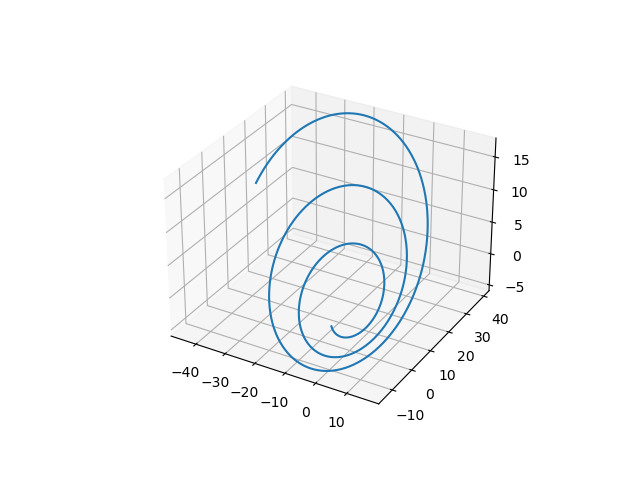

In [76]:
## Calcul
tfin = 1e+05
dt = 100
niter = int(tfin/dt) + 1
t = 0
X = X0
EJupiterPosition = np.zeros((niter,3))
EVitesse = np.zeros((niter,18))
EPosition = np.zeros((niter,18))
EJupiterPosition[0] = X[:3]
EVitesse[0] = X[18:]
EPosition[0] = X[:18]
iter = 1
while t < tfin:
    X = Eulerexp(X,100)
    EJupiterPosition[iter] = X[:3]
    EVitesse[iter] = X[18:]
    EPosition[iter] = X[:18]
    iter += 1
    t += dt
EPosition = np.reshape(EPosition,(niter,6,3))
EVitesse = np.reshape(EVitesse,(niter,6,3))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(EJupiterPosition[:,0],EJupiterPosition[:,1],EJupiterPosition[:,2])
plt.show()

Afficher la trajectoire de Jupiter au cours du temps. Si les positions de Jupiter sont stockées dans $X$, on pourra se servir des lignes de codes suivantes (à adapter en fonction de ce que vous avez fait)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(X[0,:],X[1,:],X[2,:])
plt.show()

Représenter la trajectoire des planètes. Etudier la périodicite des trajectoires en fonction du pas de temps. Commenter. 

#### Méthode de Runge-Kutta

Recommencez en utilisant la méthode de Runge Kutta d'ordre 2 : 
$$
\left \{
\begin{array}{l}
k_1 = F(X^n)\\
\displaystyle k_2 = F(X^n+\frac{dt}{2}k_1)\\
X^{n+1} = X^n + dt\ k_2
\end{array}
\right.
$$
Commentez les résultats.

In [31]:
## Runge Kutta
def RungeKutta(X,dt):
    k1 = F(X)
    k2 = F(X + dt*k1/2)
    r = X + dt*k2
    return r

<IPython.core.display.Javascript object>


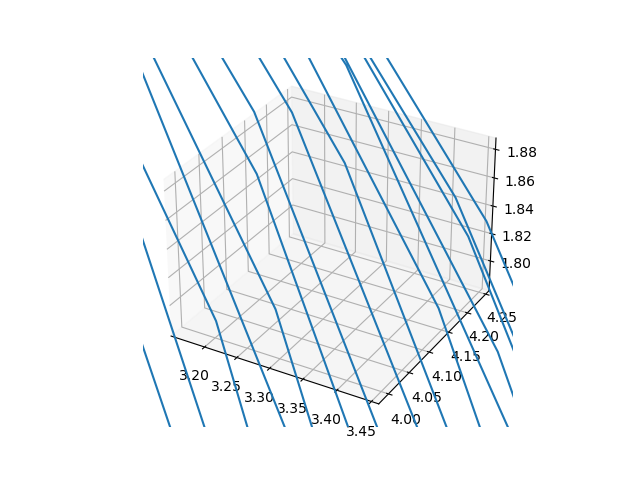

In [75]:
tfin = 1e+05
dt = 100
niter = int(tfin/dt) + 1
t = 0
X = X0
RJupiterPosition = np.zeros((niter,3))
RVitesse = np.zeros((niter,18))
RPosition = np.zeros((niter,18))
RJupiterPosition[0] = X[:3]
RVitesse[0] = X[18:]
RPosition[0] = X[:18]
iter = 1
while t < tfin:
    X = RungeKutta(X,100)
    RJupiterPosition[iter] = X[:3]
    RVitesse[iter] = X[18:]
    RPosition[iter] = X[:18]
    iter += 1
    t += 100
RPosition = np.reshape(RPosition,(niter,6,3))
RVitesse = np.reshape(EVitesse,(niter,6,3))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(RJupiterPosition[:,0],RJupiterPosition[:,1],RJupiterPosition[:,2])
plt.show()

#### Energie Potentielle

L'énergie potentielle du système est donnée par
$$
\mathcal{E}=\frac{1}{2} \sum_{i=1}^6 m_i \|\overrightarrow{v}_i\|^2 - \frac{1}{2} \sum_{1\le j < i \le 6} \frac{m_i m_j}{\|\overrightarrow{x}_i-\overrightarrow{x}_j\|}
$$
Elle vérifie
$$
\mathcal{E}'=0.
$$
Tracer, pour les deux schémas numériques, l'évolution de $\mathcal{E}$ au cours du temps, et étudier les variations en fonction de $dt$.

In [66]:
## Energie Potentielle
def Energy(Position,Vitesse):
    Kinetic = 0
    for i in range(6):
        Kinetic += masse[i]*np.linalg.norm(Vitesse[i],ord = 2)**2/2
    Potentiel = 0
    for i in range(6):
        for j in range(i):
            Potentiel += -masse[i]*masse[j]/np.linalg.norm(Position[i]-Position[j],ord = 2)
    energy = Kinetic + Potentiel
    return energy

<IPython.core.display.Javascript object>


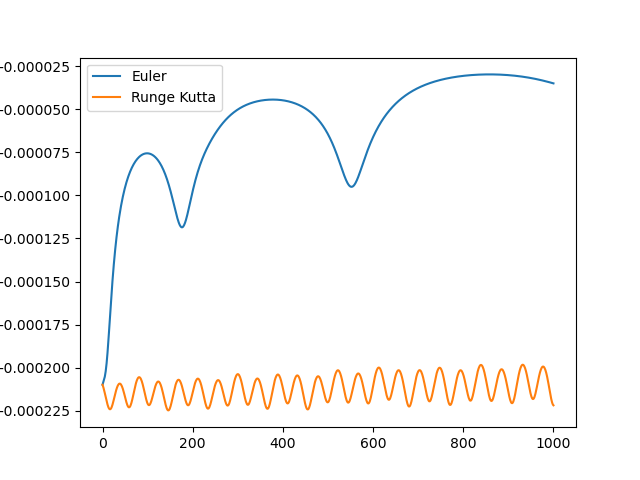

In [78]:
Ee = np.zeros(niter)
Re = np.zeros(niter)
for i in range(niter):
    Ee[i] = Energy(EPosition[i],EVitesse[i])
    Re[i] = Energy(RPosition[i],RVitesse[i])
fig1 = plt.figure()
plt.plot(range(niter),Ee,label = 'Euler')
plt.plot(range(niter),Re, label = 'Runge Kutta')
plt.legend()
plt.show()

Commenter les résultats.